In [46]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
import os

In [47]:
sentinal_fp = "newdata/AAB/"
# find every file in the sentinal_fp directory
sentinal_band_paths = [os.path.join(sentinal_fp, f) 
                       for f in os.listdir(sentinal_fp) if os.path.isfile(os.path.join(sentinal_fp, f))]
sentinal_band_paths.sort()
sentinal_band_paths

['newdata/AAB/.DS_Store',
 'newdata/AAB/2.tif',
 'newdata/AAB/3.tif',
 'newdata/AAB/4.tif',
 'newdata/AAB/8.tif',
 'newdata/AAB/sentinel_bands.tif',
 'newdata/AAB/test.cpg',
 'newdata/AAB/test.dbf',
 'newdata/AAB/test.prj',
 'newdata/AAB/test.qmd',
 'newdata/AAB/test.shp',
 'newdata/AAB/test.shx',
 'newdata/AAB/ts.cpg',
 'newdata/AAB/ts.dbf',
 'newdata/AAB/ts.prj',
 'newdata/AAB/ts.shp',
 'newdata/AAB/ts.shx']

In [48]:
img_dir = 'newdata/AAB/sentinel_bands.tif'
img_fp = img_dir

In [49]:
full_dataset = rasterio.open(img_fp)
img_rows, img_cols = full_dataset.shape
img_bands = full_dataset.count
print(full_dataset.shape) # dimensions
print(full_dataset.count) # bands

(10980, 10980)
4


(3, 10980, 10980)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

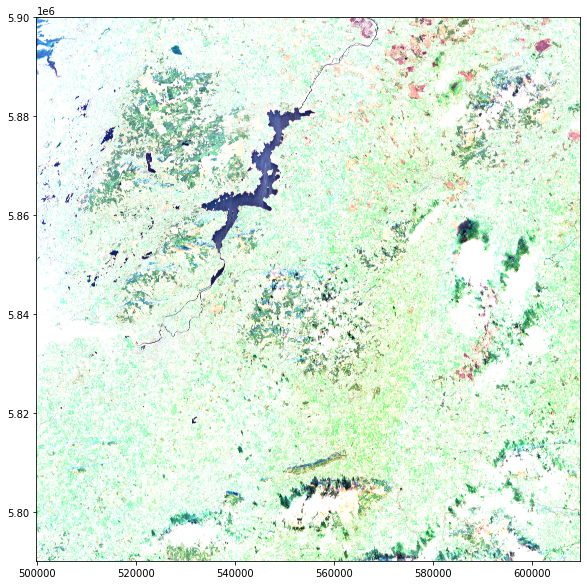

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from rasterio.plot import show

clipped_img = full_dataset.read([3,2,1])
print(clipped_img.shape)
fig, ax = plt.subplots(figsize=(10,10))
show(clipped_img, ax=ax, transform=full_dataset.transform)

In [51]:
full_dataset.crs

CRS.from_epsg(32629)

In [52]:
shapefile = gpd.read_file('newdata/AAB/test.shp')
shapefile.crs

<Derived Projected CRS: EPSG:32629>
Name: WGS 84 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°W and 6°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Côte D'Ivoire (Ivory Coast). Faroe Islands. Guinea. Ireland. Jan Mayen. Mali. Mauritania. Morocco. Portugal. Sierra Leone. Spain. United Kingdom (UK). Western Sahara.
- bounds: (-12.0, 0.0, -6.0, 84.0)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
len(shapefile)

59

In [54]:
shapefile

,OBJECTID,SEG_CD,NAME,AREA_,HECTARE,PERIMETER,HYDRO_AR,ORDER_,OS_LAYER,SOURCE,LWB,EDENLakeCo,Shape_STAr,Shape_STLe,geometry
0,9226,25_191b,Derg ( Lough ) pHMWB,3.552,355.231158,17935.093606,25,7.0,LAKE,epa,Y,250155b1050,3.552312e+06,17935.093606,"POLYGON ((537914.960 5850356.592, 537913.147 5..."
1,9227,25_191a,Derg ( Lough ),116.505,11650.502831,228775.817493,25,7.0,LAKE,epa,Y,250155b0450,1.165050e+08,228775.817493,"POLYGON ((537860.582 5850892.644, 537858.809 5..."
2,10365,25_206,None,0.001,0.083086,134.005730,25,-99.0,POND,epa,N,None,8.308576e+02,134.005730,"POLYGON ((552639.053 5877221.613, 552660.176 5..."
3,10367,25_208,None,0.001,0.109563,130.994063,25,-99.0,POND,epa,N,None,1.095634e+03,130.994063,"POLYGON ((553396.586 5850036.355, 553397.378 5..."
4,10369,25_210,None,0.001,0.060036,100.181628,25,-99.0,POND,epa,N,None,6.003569e+02,100.181628,"POLYGON ((552239.214 5853418.126, 552253.183 5..."
5,10370,25_211,None,0.002,0.219367,221.385333,25,-99.0,POND,epa,N,None,2.193673e+03,221.385333,"POLYGON ((552429.015 5853462.686, 552438.842 5..."
6,10402,25_244,None,0.000,0.047143,87.124298,25,-99.0,POND,epa,N,None,4.714262e+02,87.124298,"POLYGON ((535139.302 5858505.547, 535129.017 5..."
7,10440,25_282,None,0.001,0.059164,93.185813,25,-99.0,POND,epa,N,None,5.916442e+02,93.185813,"POLYGON ((550274.976 5886657.018, 550269.512 5..."
8,10441,25_283,None,0.008,0.794339,516.280784,25,-99.0,POND,epa,N,None,7.943387e+03,516.280784,"POLYGON ((550346.446 5886263.323, 550336.007 5..."
9,10442,25_284,None,0.001,0.087139,110.670988,25,-99.0,POND,epa,N,None,8.713879e+02,110.670988,"POLYGON ((541068.296 5887747.793, 541074.128 5..."


In [55]:
# this generates a list of shapely geometries
geoms = shapefile.geometry.values 

# let's grab a single shapely geometry to check
geometry = geoms[0] 
print(type(geometry))
print(geometry)

# transform to GeoJSON format
from shapely.geometry import mapping
feature = [mapping(geometry)] # can also do this using polygon.__geo_interface__
print(type(feature))
print(feature)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((537914.9604958253 5850356.591768526, 537913.1469422571 5850383.564065244, 537906.1089082725 5850475.216903966, 537903.3666731339 5850497.523244154, 537901.0524871479 5850512.15808268, 537889.7490032999 5850508.491877048, 537906.2044638875 5850356.804164051, 537895.0354421204 5850357.075091596, 537895.1982397393 5850358.510305938, 537886.1451351221 5850359.604688481, 537875.3824981733 5850358.564524873, 537873.8336382031 5850363.872172911, 537886.5074200962 5850364.988033445, 537891.9802312066 5850366.364143032, 537895.4962954945 5850370.872072672, 537895.7078279203 5850375.243993734, 537888.5121360589 5850439.719535111, 537882.9928840857 5850498.030349674, 537871.5436333072 5850498.370771194, 537870.8803835694 5850506.319486264, 537872.9165189192 5850506.387707757, 537881.3597118517 5850505.206028901, 537881.0656341157 5850508.541120808, 537880.32962582 5850518.778752307, 537882.0172071302 5850527.28015934, 537886.9279828721 5850552.

In [56]:
out_image, out_transform = mask(full_dataset, feature, crop=True)
out_image.shape

(4, 56, 21)

In [57]:
full_dataset.close()

In [58]:
X = np.array([], dtype=np.int8).reshape(0,4) # pixels for training
y = np.array([], dtype=np.string_) # labels for training

# extract the raster values within the polygon 
with rasterio.open(img_fp) as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]

        # the mask function returns an array of the raster pixels within this feature
        out_image, out_transform = mask(src, feature, crop=True) 
        # eliminate all the pixels with 0 values for all 4 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image[:,~np.all(out_image == 0, axis=0)]
        # eliminate all the pixels with 255 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image_trimmed[:,~np.all(out_image_trimmed == 255, axis=0)]
        # reshape the array to [pixel count, bands]
        out_image_reshaped = out_image_trimmed.reshape(-1, band_count)
        # append the labels to the y array
        y = np.append(y,[shapefile["OS_LAYER"][index]] * out_image_reshaped.shape[0]) 
        # stack the pizels onto the pixel array
        X = np.vstack((X,out_image_reshaped))     

In [59]:
# What are our classification labels?
labels = np.unique(shapefile["OS_LAYER"])
print('The training data include {n} classes: {classes}\n'.format(n=labels.size, 
                                                                classes=labels))

# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

The training data include 3 classes: ['LAKE' 'POND' 'RESERVOIR']

Our X matrix is sized: (1186931, 4)
Our y array is sized: (1186931,)


Text(0.5, 1.0, 'Band Intensities Higher Ref Subset')

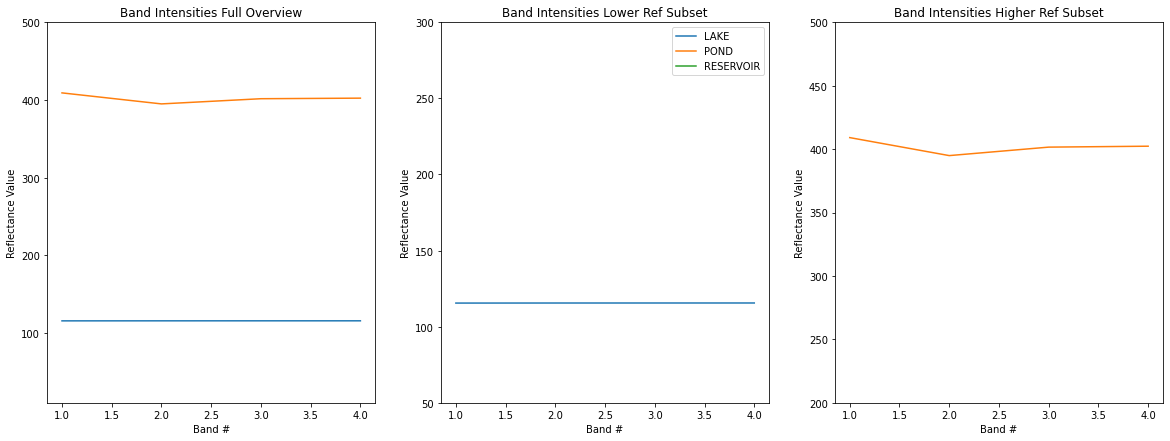

In [60]:
fig, ax = plt.subplots(1,3, figsize=[20,7])

# numbers 1-4
band_count = np.arange(1,5)

classes = np.unique(y)
for class_type in classes:
    band_intensity = np.mean(X[y==class_type, :], axis=0)
    ax[0].plot(band_count, band_intensity, label=class_type)
    ax[1].plot(band_count, band_intensity, label=class_type)
    ax[2].plot(band_count, band_intensity, label=class_type)
# plot them as lines

# Add some axis labels
ax[0].set_xlabel('Band #')
ax[0].set_ylabel('Reflectance Value')
ax[1].set_ylabel('Reflectance Value')
ax[1].set_xlabel('Band #')
ax[2].set_ylabel('Reflectance Value')
ax[2].set_xlabel('Band #')
ax[0].set_ylim(10,500)
ax[1].set_ylim(50,300)
ax[2].set_ylim(200,500)
#ax.set
ax[1].legend(loc="upper right")
# Add a title
ax[0].set_title('Band Intensities Full Overview')
ax[1].set_title('Band Intensities Lower Ref Subset')
ax[2].set_title('Band Intensities Higher Ref Subset')

In [61]:
def str_class_to_int(class_array):
    class_array[class_array == 'LAKE'] = 0
    class_array[class_array == 'POND'] = 1
    class_array[class_array == 'RESERVOIR'] = 2
    return(class_array.astype(int))

In [62]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [63]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image

In [64]:
with rasterio.open(img_fp) as src:
    # may need to reduce this image size if your kernel crashes, takes a lot of memory
    img = src.read()

# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification
print(img.shape)
reshaped_img = reshape_as_image(img)
print(reshaped_img.shape)

(4, 10980, 10980)
(10980, 10980, 4)


In [65]:
class_prediction = gnb.predict(reshaped_img.reshape(-1, 4))

# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction = class_prediction.reshape(reshaped_img[:, :, 0].shape)

In [66]:
class_prediction = str_class_to_int(class_prediction)

In [67]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict((
    (0, (48, 156, 214, 255)),   # Blue - Lake
    (1, (139,69,19, 255)),      # Brown - pond
    (2, (96, 19, 134, 255)),    # Purple - reservior
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

<ipython-input-74-addc0eceb0d6>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


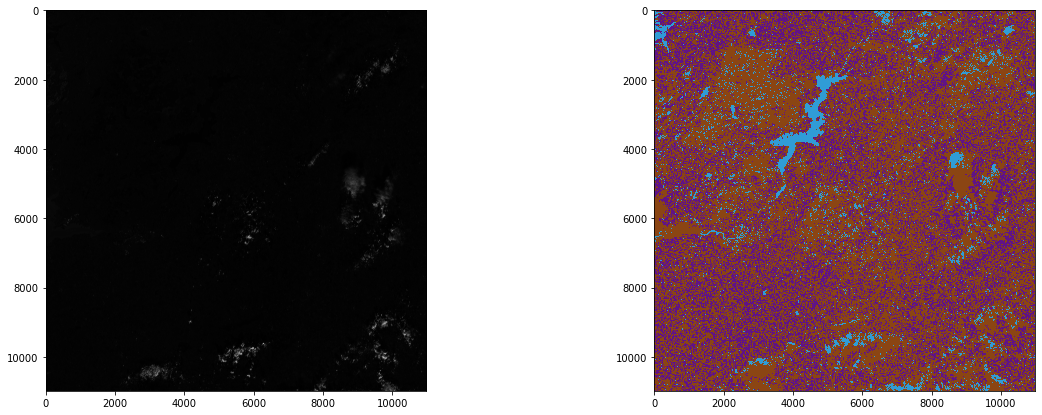

In [74]:
fig, axs = plt.subplots(1,2, figsize=[20,7])

img_stretched = color_stretch(reshaped_img, [0, 0, 0])
axs[0].imshow(img_stretched)

axs[1].imshow(class_prediction, cmap=cmap, interpolation='none')

fig.show()

In [72]:
fig.savefig('saved_figure-1000dpi.png', dpi = 1000)